# <font color = Orange> Project -  Alternus Vera </font>



### <font color = Brown>Team: code-monkeys </font>


### <font color = Brown>Name: Puja Kawale (012506156)</font>

### <font color = Brown> GitHub: https://github.com/pujakb/ML/tree/master/News_Classifier</font>

### <font color = green>Factor : Controversy </font>
<br>
### <font color = green>Domain ranking achived using cosine similarity </font>
<br>

## <font color = Orange> Importing Libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
import csv

## <font color = Orange> Loading the Data </font>

In [2]:
training = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//train.tsv',sep='\t')
testing = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//test.tsv',sep='\t')
validation = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//valid.tsv',sep='\t')
vocabulary = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\sensation_dictionary.csv')

In [3]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
training.columns = columns
testing.columns = columns
validation.columns = columns
training.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [4]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    training.isnull().sum()
    training.info()
        
    print("check finished.")

    #below datasets were also used
    testing.isnull().sum()
    testing.info()

    validation.isnull().sum()
    validation.info()

data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
id                      10239 non-null object
label                   10239 non-null object
statement               10239 non-null object
subjects                10237 non-null object
speaker                 10237 non-null object
speaker_job             7342 non-null object
state                   8031 non-null object
party                   10237 non-null object
barely_true_counts      10237 non-null float64
false_counts            10237 non-null float64
half_true_counts        10237 non-null float64
mostly_true_counts      10237 non-null float64
pants_on_fire_counts    10237 non-null float64
context                 10137 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 14 columns):
id                      1266 non-null obj

## <font color = Orange>Observing the data </font>

In [5]:
#data observation
def data_obs():
    print("training dataset size:")
    print(training.shape)
    print(training.head(10))

    #below dataset were used for testing and validation purposes
    print(training.shape)
    print(training.head(10))
    
    print(validation.shape)
    print(validation.head(10))
    
data_obs()

training dataset size:
(10239, 14)
           id        label                                          statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   
5   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
6    153.json    half-true  I'm the only person on this stage who has work...   
7   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
8   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   
9   7115.json  mostly-true  For the first time in history, the share of th...   

                                    subjects                 speaker  \
0

9                     0  a speech at the Democratic National Convention...  


In [6]:
training=training[['label','statement']]
training.head(5)

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [7]:
training.groupby('label').describe()

statement         \
                count unique   
label                          
barely-true      1654   1654   
false            1994   1987   
half-true        2114   2112   
mostly-true      1962   1962   
pants-fire        839    839   
true             1676   1674   

                                                                     
                                                           top freq  
label                                                                
barely-true  Says Gov. Scott Walker signed abortion, sex ed...    1  
false        On changing the rules for filibusters on presi...    3  
half-true            Twenty million Americans are out of work.    2  
mostly-true  71% of WIs roads are in poor or mediocre condi...    1  
pants-fire   The average rate of fraud in the Earned Income...    1  
true                Says Mitt Romney flip-flopped on abortion.    2

In [8]:
training.iloc[0]["statement"][:len(training.iloc[0]["statement"])]

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE6A128>,
      dtype=object)

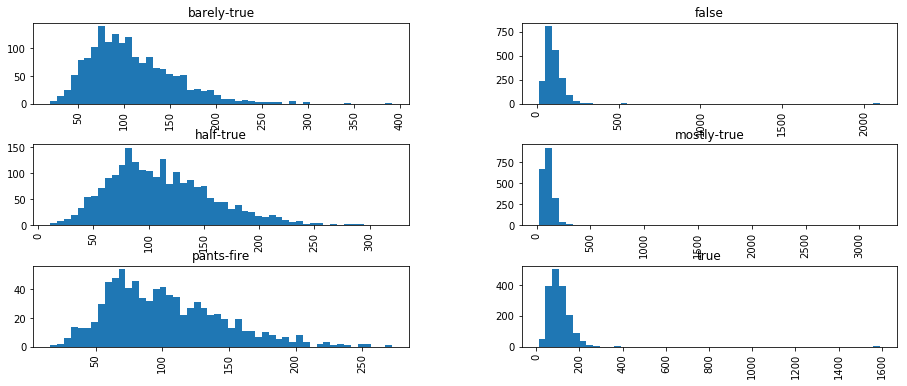

In [9]:
training['length'] = training['statement'].apply(len)
training.hist(column='length',by='label',bins=50, figsize=(15,6))

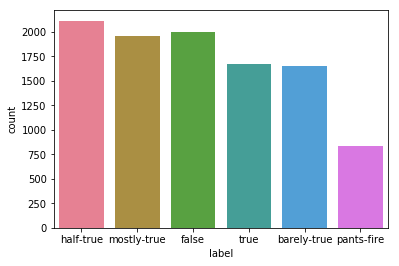

In [10]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sns.countplot(x='label', data=dataFile, palette='husl')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(training)

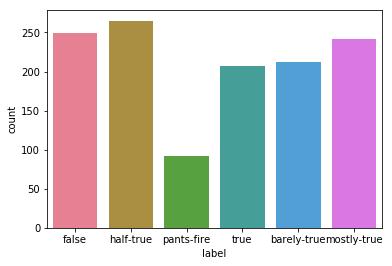

In [11]:
create_distribution(testing)

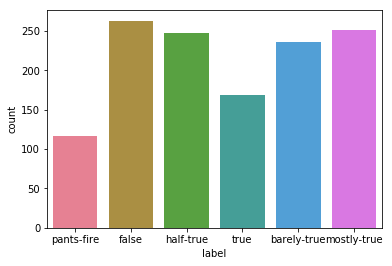

In [12]:
create_distribution(validation)

In [13]:
training.label.unique()

array(['half-true', 'mostly-true', 'false', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [14]:
# This is in case we want to conduct binary classification
# Our focus is to develop a multi-classification model

# train_news['label']=np.where(train_news['label']=='half-true','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='mostly-true','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='barely-true','false',train_news['label'])
# train_news['label']=np.where(train_news['label']=='pants-fire','false',train_news['label'])
# train_news['label']=np.where(train_news['label']=='TRUE','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='FALSE','false',train_news['label'])

# plt.title('statement count Vs label')
# train_news.groupby(['label']).size().plot(kind='bar', color='blue')
# plt.xlabel('count')
# plt.show()

# <font color = Orange> Factor: Controversy </font>
    

Added a dictionary to filter the document thats contain the words that make the news statement sensation ...that go viral and become breaking.

In [93]:
my_dictionary = "contestation debate difference difficulty disagreement disputation dispute dissension dissensus firestorm nonconcurrence quarrel strife joke jail criticize image famous fame reputation impression disguise mask censure denounce condemn attack lambaste pillory controversy arguement exposed watch link click channel posted news prevailing mainstream vogue circulate hot widespread"
my_dictionary

'contestation debate difference difficulty disagreement disputation dispute dissension dissensus firestorm nonconcurrence quarrel strife joke jail criticize image famous fame reputation impression disguise mask censure denounce condemn attack lambaste pillory controversy arguement exposed watch link click channel posted news prevailing mainstream vogue circulate hot widespread'

In [94]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

def TextCleansing(txt):
    rem = re.sub('[^a-zA-Z]', ' ', txt)
    rem = rem.lower()
    rem = rem.split()
    ps = PorterStemmer()
    rem = [ps.stem(word) for word in rem if not word in set(stopwords.words('english'))]
    rem = ' '.join(rem)
    return rem

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'hadn', 'ma', 'more', "wouldn't", 'for', "needn't", 'all', "wasn't", 'only', 'about', 'yours', 'should', "aren't", "weren't", 'but', "didn't", 'themselves', 'such', 'shouldn', "you'd", 'ourselves', 'each', "hadn't", 'did', 'mightn', 'our', 'won', 'wouldn', 'is', 'from', 'their', "couldn't", 'they', 'here', 'ain', 'o', 'with', 'against', 'doing', 'your', 'doesn', 'too', 'than', 'am', 'yourselves', 'weren', 'nor', 'both', "isn't", 'the', 'not', 'she', 'while', 'have', 'her', 're', 'its', 'below', 'wasn', 'through', 'very', "you're", 'further', 'until', 'over', 'having', 'whom', 'other', 'himself', 'if', 'how', 'between', 'll', 'had', 'which', 'was', 'into', 'couldn', 'now', 's', 'when', "mustn't", 'does', 'you', 'herself', 'because', 'there', 've', 'down', 'd', 'didn', 'i', 'who', 'me', 'do', 'above', 'an', 'those', 'once', 'no', "shan't", 'a', 'that', 'any', 'at', 'shan', 'myself', 'are', 'it', 'just', "should've", 'has', 'own', 'after', "you'll", "haven't", 'under', "mightn't", "shoul

In [96]:
TextCleansing(my_dictionary)
my_dictionary

'contestation debate difference difficulty disagreement disputation dispute dissension dissensus firestorm nonconcurrence quarrel strife joke jail criticize image famous fame reputation impression disguise mask censure denounce condemn attack lambaste pillory controversy arguement exposed watch link click channel posted news prevailing mainstream vogue circulate hot widespread'

## <font color = Orange>**Distillation:** </font>
#### <font color = Brown> Tokenization: Split the text into sentences, Sentences into words, Lowercase the words, remove punctuation.
#### <font color = Brown> Words that have fewer than 3 characters are removed.
#### <font color = Brown> stopwords are removed.
#### <font color = Brown> lemmatization — words in third person are changed to first person and verbs in past and future tenses are changed into present.
#### <font color = Brown> Stemming — words are reduced to their root form.</font>

In [97]:
def cleaning(raw_news):
    import nltk    
    news = re.sub("[^a-zA-Z]", " ", raw_news)    
    news =  news.lower()     
    news_words = nltk.word_tokenize( news)        
    stops = set(nltk.corpus.stopwords.words("english"))       
    words = [w for w in  news_words  if not w in stops]        
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]     
    return " ".join(stems)

In [98]:
import re
training['statement'] = training["statement"].apply(cleaning) 
testing['statement'] = testing["statement"].apply(cleaning)
print(len(training), "statements")
print(len(testing), "statements")

10239 statements
1266 statements


## <font color = orange>Word Cloud Visualization </font>

Google says a word cloud is “an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.”
So, the more often a specific words appears in your text, the bigger and bolder it appears in your word cloud.

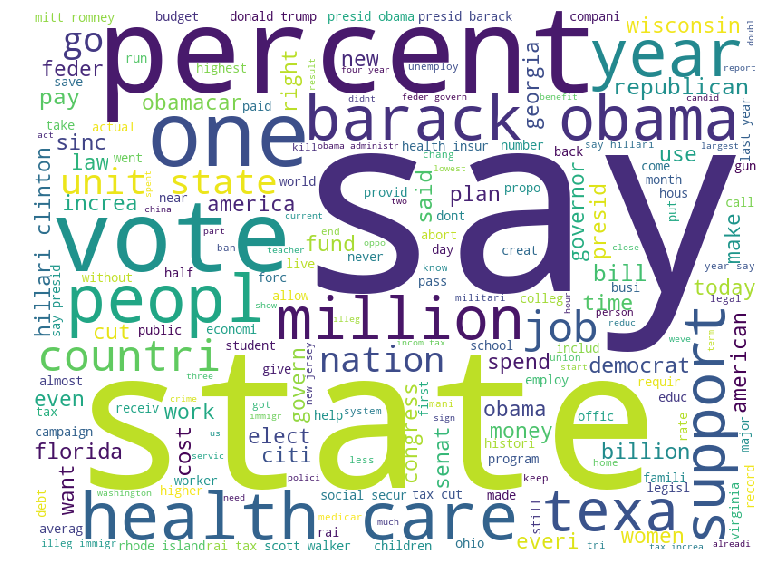

In [99]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(training['statement']))

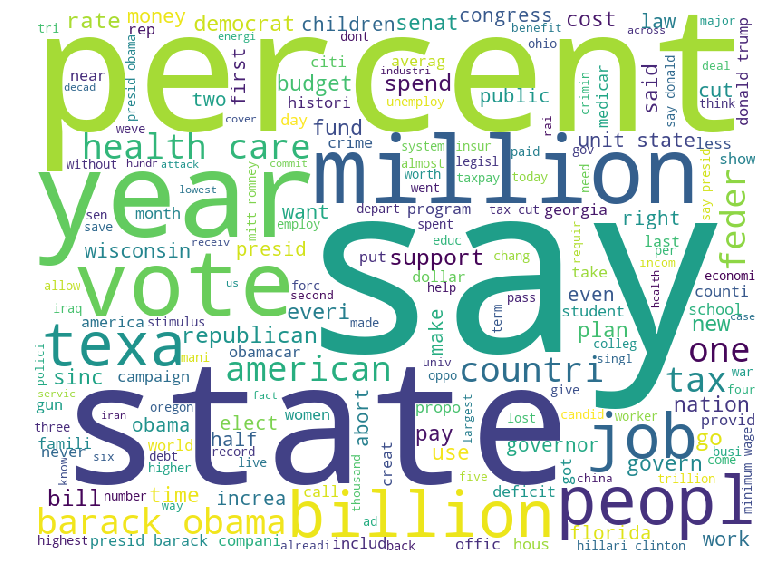

In [100]:
cloud(' '.join(testing['statement']))

In [101]:
training.head(3)

,label,statement,length
0,half-true,declin coal start start natur gas took start b...,141
1,mostly-true,hillari clinton agr john mccain vote give geor...,105
2,false,health care reform legisl like mandat free sex...,78


## Calculating <font color = Orange>Cosine Similary </font>of all the news headlines with the Sensationalism vocabulary. This would help differentiating the Breaking news from rest of the news

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
import csv

## <font color = orange>Tokenization </font>
Tokenization is the process of dividing text into a set of meaningful pieces. These pieces are called tokens. For example, we can divide a chunk of text into words, or we can divide it into sentences

In [103]:
corpus = []
import gensim
from nltk.tokenize import word_tokenize

for text in training['statement']:
    corpus.append(text)

Below if the corpus of all tokens inside the statement column

In [104]:
print(corpus)

['declin coal start start natur gas took start begin presid georg w bush administr', 'hillari clinton agr john mccain vote give georg bush benefit doubt iran', 'health care reform legisl like mandat free sex chang surgeri', 'econom turnaround start end term', 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad', 'jim dunnam live district repr year', 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg', 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif', 'say gop primari oppon glenn grothman joe leibham cast compromi vote cost million higher electr cost', 'first time histori share nation popular vote margin smaller latino vote margin', 'sinc near million american slip middl class poverti', 'mitt romney governor massachusett didnt slow rate growth govern actual cut', 'economi bled billion due govern shutdown', 'afford care act alreadi sen waiv otherwi suspend'

Below is the copus of all the tokens inside the statement coloumn and sensationalism dictionary

In [105]:
corpus.append(my_dictionary)
print(corpus)

['declin coal start start natur gas took start begin presid georg w bush administr', 'hillari clinton agr john mccain vote give georg bush benefit doubt iran', 'health care reform legisl like mandat free sex chang surgeri', 'econom turnaround start end term', 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad', 'jim dunnam live district repr year', 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg', 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif', 'say gop primari oppon glenn grothman joe leibham cast compromi vote cost million higher electr cost', 'first time histori share nation popular vote margin smaller latino vote margin', 'sinc near million american slip middl class poverti', 'mitt romney governor massachusett didnt slow rate growth govern actual cut', 'economi bled billion due govern shutdown', 'afford care act alreadi sen waiv otherwi suspend'

## <font color = orange>TFidf Vectorization</font>
Tf-idf stands for term frequency-inverse document frequency.This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus
Convert a collection of raw documents to a matrix of TF-IDF features. Equivalent to CountVectorizer followed by TfidfTransformer.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [107]:
X = vectorizer.fit_transform(corpus)
X
print(X)

  (0, 1677)	0.2738374304455053
  (0, 1245)	0.2754891097392278
  (0, 6387)	0.6784639163161784
  (0, 4467)	0.2754891097392278
  (0, 2695)	0.22476016759484116
  (0, 6867)	0.20271749904885128
  (0, 595)	0.26785505749732624
  (0, 5229)	0.14821230010119513
  (0, 2734)	0.2234140694522201
  (0, 905)	0.19695752559571353
  (0, 88)	0.19718120693930158
  (1, 2734)	0.2894702848969141
  (1, 905)	0.2551914084308619
  (1, 3096)	0.24744024394102065
  (1, 1226)	0.23217606754896308
  (1, 138)	0.3435818448790626
  (1, 3552)	0.26505747695182685
  (1, 4142)	0.27304360933647137
  (1, 7282)	0.19195158890134262
  (1, 2766)	0.271822098953158
  (1, 620)	0.28778466209962905
  (1, 1969)	0.43367695433807024
  (1, 3449)	0.30243471579471704
  (2, 3027)	0.21594498891537106
  (2, 993)	0.22385201282014103
  :	:
  (10239, 1888)	0.15711221481199697
  (10239, 1889)	0.15711221481199697
  (10239, 1894)	0.15711221481199697
  (10239, 1895)	0.15711221481199697
  (10239, 2480)	0.15711221481199697
  (10239, 4560)	0.15711221481199

In [108]:
training['statement'][1628]

'money plan parenthood bill would keep govern open'

In [109]:
vectorizer.vocabulary_

{'declin': 1677,
 'coal': 1245,
 'start': 6387,
 'natur': 4467,
 'gas': 2695,
 'took': 6867,
 'begin': 595,
 'presid': 5229,
 'georg': 2734,
 'bush': 905,
 'administr': 88,
 'hillari': 3096,
 'clinton': 1226,
 'agr': 138,
 'john': 3552,
 'mccain': 4142,
 'vote': 7282,
 'give': 2766,
 'benefit': 620,
 'doubt': 1969,
 'iran': 3449,
 'health': 3027,
 'care': 993,
 'reform': 5529,
 'legisl': 3831,
 'like': 3897,
 'mandat': 4050,
 'free': 2607,
 'sex': 6030,
 'chang': 1101,
 'surgeri': 6586,
 'econom': 2070,
 'turnaround': 6999,
 'end': 2159,
 'term': 6731,
 'chicago': 1141,
 'bear': 577,
 'quarterback': 5371,
 'last': 3775,
 'year': 7551,
 'total': 6882,
 'number': 4606,
 'tenur': 6730,
 'uw': 7186,
 'faculti': 2345,
 'fire': 2476,
 'two': 7014,
 'decad': 1665,
 'jim': 3544,
 'dunnam': 2034,
 'live': 3926,
 'district': 1908,
 'repr': 5599,
 'person': 4995,
 'stage': 6366,
 'work': 7507,
 'activ': 68,
 'pass': 4891,
 'along': 208,
 'russ': 5788,
 'feingold': 2417,
 'toughest': 6887,
 'ethic

In [110]:
features = vectorizer.get_feature_names()
print(features[1211])

clayton


In [111]:
X.shape

(10240, 7599)

In [112]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
from scipy import spatial

In [114]:
X

<10240x7599 sparse matrix of type '<class 'numpy.float64'>'
	with 103106 stored elements in Compressed Sparse Row format>

Cosine similarity

In [120]:
cos_statement1 = 1 - spatial.distance.cosine(X[7344].toarray(), X[10239].toarray())
cos_statement1

0.0

## <font color = Brown> Below we get all the news headlines along with its similarity score with Controversial words dicationary </font>

we can easily interpret that higher the similarity score, hiher are the chances of the news to be sensational, viral, breaking !! <br>
reference: https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python

In [121]:
for i in range(10239):
    cos_statement1 = 1 - spatial.distance.cosine(X[i].toarray(), X[10239].toarray())
    print(training['statement'][i], "=>",cos_statement1)

declin coal start start natur gas took start begin presid georg w bush administr => 0.0
hillari clinton agr john mccain vote give georg bush benefit doubt iran => 0.0
health care reform legisl like mandat free sex chang surgeri => 0.0
econom turnaround start end term => 0.0
chicago bear start quarterback last year total number tenur uw faculti fire last two decad => 0.0
jim dunnam live district repr year => 0.0
person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg => 0.0
howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif => 0.0
say gop primari oppon glenn grothman joe leibham cast compromi vote cost million higher electr cost => 0.0
first time histori share nation popular vote margin smaller latino vote margin => 0.0
sinc near million american slip middl class poverti => 0.0
mitt romney governor massachusett didnt slow rate growth govern actual cut => 0.0
economi bled billion due govern shutdown => 0.0

presid obama decid meet prime minist benjamin netanyahu new york => 0.0
major state marri freeli still fire love => 0.0
say oregon rep peter defazio earl blumenau socialist open serv u congress => 0.0
rudi giuliani probabl underqualifi man sinc georg bush seek presid => 0.0
half presid governor half senat => 0.0
britain vote leav european union within hour american lost billion k => 0.0
medicaid spend declin percent second declin year => 0.0
say texa constabl die line duti => 0.0
gov rick scott cut cost prepaid colleg tuition near => 0.0
citi columbus would save million year employ contribut guarant check pension => 0.0
florida cfo shut krakow scam refund million josephin victim con man => 0.0
women get comput scienc degr factor plus => 0.0
air forc want taxpay fund fantasi footbal leagu => 0.0
barack hussein obama forc court accept islam sharia law domest disput => 0.0
percent murder crime commit gun peopl actual legal purcha gun => 0.0
neighborhood school close => 0.0
told gay organ 

high school student arrest campus twice like graduat four time less like graduat theyv appear court => 0.0
unit state imprison nation world => 0.0
say marco rubio one open border => 0.0
year feder spend educ grown percent test score remain flat => 0.0
say cut medicar affect peopl alreadi paid paid => 0.0
david alameel give thousand dollar support republican parti candid includ john cornyn greg abbott => 0.0
american healthcar system burn percent nation gdp nobodi el close => 0.0
provid port mile closer europ eastern port => 0.0
say need photo id purcha sudaf texa => 0.0
twenti percent hous portland pearl district afford => 0.0
say allow payrol tax holiday expir would end cost anoth estim job => 0.0
hillari clinton support nafta perman china trade pennsylvania lost thousand job => 0.0
numer studi shown call right work law generat job econom growth => 0.0
obama budget plan would take nation debt percent gross nation product histor percent => 0.0
say hillari clinton said veteran affair sc

say rai averag famili incom percent tenur arkansa governor => 0.0
tri give us million build high speed train goe mile hour => 0.0
say cbo estim fulli extend bush tax cut would add million job million job => 0.0
presid reagan rai debt ceil time georg w bush seven time => 0.0
accord david cay johnston averag american pay percent incom feder tax richest american pay percent incom feder tax => 0.0
young american right theyr cover health insur => 0.0
corpor incom tax account percent feder tax revenu today despit record break profit corpor tax bring less percent => 0.0
last year texa creat percent net new job nationwid => 0.0
say two third group target ir scrutini conserv => 0.0
class patric lumumba univ moscow mahmoud abba one member class ali khamenei first establish relationship young vladimir putin => 0.0
last week texa state board educ sboe led rick perri appoint vote remov thoma jefferson social studi textbook standard right thoma jefferson delet list histor figur inspir polit chang =>

countri found congress exact attitud sanctiti christma celebr eleven today yeah open => 0.0
miami dade counti spend school system million everi year educ recent immigr => 0.0
omnibus bill billion earmark => 0.0
trump propo enact largest tax increa american histori => 0.0
senat mccain talk tough earmark good earmark account billion budget => 0.0
kim myer vote repeat rai tax peopl broom counti made million tax save famili busi reloc headquart => 0.0
california prop would requirecondom usein adult film would put worker adult film industri riskfor lawsuit harass => 0.0
pay among highest toll nation privileg cross bridg => 0.0
sen isakson chambliss vote unemploy insur vote kill near georgia job => 0.0
say real estat tax put place pay obamacar => 0.0
say today unemploy run near percent last four year legislatur hasnt done much lower => 0.0
say kay bailey hutchison vote sanctuari citi => 0.0
john mica vote borrow trillion => 0.0
say oppon mari burk told report would requir worker give bargain

first time ever energi independ => 0.0
last year exxon pocket near million everi hour => 0.0
aarp largest resel insur countri vest interest see market resel supplement insur expand => 0.0
medicar month premium go due provi incorpor obamacar legisl purpo delay confus elect campaign => 0.0
right percent florida student leav high school read grade level => 0.0
say republican sen john mccain vote presid cuyahoga counti general elect seven state => 0.0
marco rubio vote fund health clinic provid critic care public health emerg zika => 0.0
troubl leav pet car leav child car => 0.0
sayspet kilmartin vote favor expand good behavior statut sex offend => 0.0
let occupi atlanta protest stay woodruff park => 0.0
put forward add penni debt => 0.0
african american men prison jail probat parol enslav => 0.03636308063038518
first week governor tim kain propo near billion tax increa billion includ tax increa peopl earn littl year => 0.0
lee fisher watch almost nine job ohio lost lost state countri => 0.

minimum percent view child pornographi end molest children result => 0.0
differ way governor mccrori rai tax middl incom famili => 0.0
romney advi admit romneycar blueprint obamacar => 0.0
say texa voter ask act novemb propo constitut amend affect properti tax => 0.0
hard get peopl portland vote yes ballot measur especi opposit => 0.0
nytim sent letter subscrib apolog bad coverag => 0.0
busi oregon shrink back busi result law => 0.0
say straight year major hurrican strike land unit state bore hole right whole climat chang argument => 0.0
spend money health care per capita unit state countri world develop countri world spend time averag countri spend second per capita switzerland spend percent => 0.0
half million vote sander => 0.0
abort => 0.0
member congress receiv full pay retir serv one term => 0.0
say work democrat legislatur balanc spend revenu end four year term raini day fund establish billion => 0.0
alon infant report die follow attempt abort notabl one year => 0.0
say caus dea

republican extremist tri take away abort right blake rocap stop => 0.0
say obama refus recogn jerusalem capit israel => 0.0
say help draft part dodd frank wall street reform bill => 0.0
say incom tax rate eisenhow high percent => 0.0
american homeownership rate q lowest rate yrs => 0.0
romney medicar plan estim cost averag senior year => 0.0
staf ratio offic resid seattl wed offic depart => 0.0
depart veteran affair doctor prohibit recommend medic marijuana => 0.0
career politician daniel webster becam speaker hous wast money spiral stairca offic => 0.0
texa highest level turnout ever primari => 0.0
say differ barack obama year experi => 0.0
veteran take live day => 0.0
unit state major countri earth doesnt guarant health care peopl right privileg => 0.0
said former u ambassador kenya scott gration forc resign two year ago person use email => 0.0
say florida model success pretrial relea program => 0.0
ever visit nashvil washington c see mani name initi carv desk => 0.0
redistribut neve

say fiduciari respon busi famili employ pay tax legal requir => 0.0
feder govern could save million annual circul coin instead bill => 0.0
hous crisi catherin cortez masto gave sweetheart contract worth million c law firm donat thousand polit campaign => 0.0
rick scott forc resign head compani pled guilti massiv amount systemat fraud includ feloni lead histor billion fine => 0.0
say feder govern restrict much salt put food => 0.0
lead american revolutionari war guy boston got head blown tri secret rai tax tea => 0.0
propo nclaw bodi camera footag give polic broad author keep video footag secret even individu film => 0.0
wage state local govern employ would affect minimum wage increa georgia combin cost taxpay million annual => 0.0
make sen histor drop race still competit bobbi kennedi assassin june california => 0.0
say couldnt keep inch redfish caught fish rule => 0.0
say oppon kathi tovo believ austin invest much cop firefight param protect famili neighborhood => 0.0
newt gingrich fi

florida law like indiana religi freedom restor act => 0.0
thing said prank call blogger pose gop contributor david koch thing ive said public along wisconsin budget debat => 0.0
say photograph hillari clinton debat show could earpiec => 0.0
say joe biden went china said sympath wouldnt second guess one child polici forc abort steril => 0.0
whether seat roland burri new senat illinoi => 0.0
feder tax refund delay octob => 0.0
forti five state allow open carri firearm => 0.0
obama remain silent never ask feel church honor farrakhan => 0.0
donald trump spoke phoenix look audienc eye said build wall deport everybodi said quot gone gone one one go tape see donald trump said => 0.0
john edward never ever begin polit career never taken pac money money washington lobbyist ever joe trippi senior campaign advi => 0.0
jeb bush governor first four year governor medicaid program grew twice fast mine => 0.0
univ wisconsin system job life tenur program professor => 0.0
unemploy among oregon high scho

say donald trump promi mass deport latino famili => 0.0
palin stop bridg nowher => 0.0
say state tax burden per citizen new york twice high florida => 0.0
two third peopl wisconsin strong disagr idea perman take away peopl right collect bargain => 0.0
say eric cantor co author hous gop principl immigr reform new york time washington postsaid thatcaptur essenc senat immigr bill => 0.0
wisconsin th congress district manufactur job almost nation => 0.0
lost health insur doctor obamacar => 0.0
far stand committ fewer stand committ weve save state quarter million dollar reduct stand committ => 0.0
obama entir nation secur team includ secretari state said want arm train equip syrian rebel forc made unilat deci turn => 0.0
governor elect scott walker opposit high speed rail kill wisconsin job => 0.0
candid pocket big money peopl want destroy coal mitch mcconnel => 0.0
tran pacif partnership knock tariff countri place american product good => 0.0
trillion nation debt bill would cover entir sta

say marco rubio vote everi bill would help keep famili safe even vote bipartisan measur introduc republican prevent peopl fli list purcha gun => 0.0
account attack benghazi written former white hous press secretari dee dee myer show bodi u ambassador libya christoph steven drag street abus => 0.015397747797861072
state texa fund women health servic histor high level increa level anoth million next two year => 0.0
say ten higher educ fund model percent outcom base alreadi see model chang way postsecondari institut busi => 0.0
without medicaid expan ohioan could get primari care emerg room cost everybodi lot money => 0.0
truth oil would drill could sent countri world reduc use foreign oil one singl drop => 0.0
say senat resolut would restor month general assist payment prevent peopl commit crime => 0.0
presid bush took offic inherit billion budget surplus project year surplus trillion end term left trillion deficit project year shortfal trillion => 0.0
rhode island pay among highest auto

millenni percent workforc next year => 0.0
percent provi ballot cast elect disqualifi folk duli regist voter => 0.0
fourth amend fought revolut john adam said spark led war independ => 0.0
vast major peopl countri keep health insur plan => 0.0
democrat health care law ad year solvenc medicar => 0.0
segment beer market grow craft beer segment => 0.0
say hourpropo cleveland aggress minimum wage increa countri => 0.0
see kid healthier => 0.0
rural women women illit morocco => 0.0
kathleen peter refus take stand repeal obamacar => 0.0
mccain say price gas tax holiday would bridg nowher anoth pork barrel project => 0.0
say billion medicar cut come => 0.0
fenc work great wall china berlin wall good among peopl especi friend like unit state mexico => 0.0
say requir state septic inspect would cost septic tank owner everi five year => 0.0
say multnomah counti librari system second busiest nation => 0.0
one american today get ssdi ssi one american disabl => 0.0
percent peopl cast provi ballot fl

higher beer product higher consumpt go hand hand => 0.0
see decrea violent crime => 0.0
say billion privat invest along streetcar => 0.0
say arkansa republican rep tom cotton vote provid congress taxpay fund health care life => 0.0
israel per capita incom greater probabl three fourth rest world => 0.0
well percent feloni case nation commit defend grew father absent household => 0.0
first interview presid barack obama chose arab tv apolog => 0.0
georgia track traffic fatal year rever nine year declin => 0.0
busi close open virginia today => 0.0
record number peopl live poverti => 0.0
obama serv board former weather underground member william ayer relationship mr ayer board continu => 0.0
say obama broke promi offer comprehen immigr bill first year => 0.0
media wont publish real photo trayvon martin tattoo face => 0.0
rand paul support obama negoti iran => 0.0
social secur project remain solvent whiteh cosponsor bill would extend life program addit year => 0.0
singl parent coupl kid easi

say scott walker reject legisl make colleg loan payment tax deduct result rai tax student => 0.0
obama posit nuclear arm march toward global zero => 0.0
peopl becom citizen dream act turn sponsor illeg immigr parent legal => 0.0
say wisconsin manufactur commerc survey reveal percent busi execut respond favor right work legisl => 0.0
capitol polic forc go far use paramilitari equip deal sing protest madison => 0.0
ten thousand fraudul clinton vote found ohio wareh => 0.0
come protest madison almost outsid wisconsin => 0.0
say democrat runoff oppon gradi yarbrough twice previous ran statewid republican => 0.0
say u rep john barrow left taxpay hook k studi genet makeup ant => 0.0
presid obama recent plan cut million wast within administr wont actual save money hes go spend elsewh => 0.0
estim save debt ceil deal pay half cost extend bush era tax cut anoth decad => 0.0
florida secretari state kurt brown allow illeg voter regist florida => 0.0
budget ted cruz ever vote time senat budget cut

privat social secur bad idea georg w bush propo bad idea today sen mccain campaign went even suggest cut cost live adjust rai retir age => 0.0
deport illeg immigr => 0.0
countri bankrupt => 0.0
spend stagger amount money health care trillion almost twice much countri per person => 0.0
prevent care save money => 0.0
say conni mack iv co sponsor bill take third social secur trust fund give individu account senior citizen invest stock market => 0.0
nation guard saw midwest flood function effect could talk nation guard repr fifteen helicopt region oversea flood => 0.0
fulton counti success reduc number pregnanc among year old => 0.0
say texa hous record number new member join rank => 0.0
say democrat cut million state budget inform technolog improv => 0.0
austin pea elementari school creat part texa constitut => 0.0
pretti proud guy stage ever job privat sector => 0.0
percent tax rate call presid barack obama propo buffett rule lower prescrib tax rate millionair alreadi millionair peopl ma

believ senat clinton rai money peopl oil gas industri candid democrat republican => 0.0
gov rick scott tri get waiver feder health care law would deni consum florida right million rebat hmos => 0.0
jason carter actual oppo fund educ senat => 0.0
everi day unit state lose factori => 0.0
percent american get paid minimum wage => 0.0
afford care act major reason weve seen fewer prevent patient death hospit => 0.0
patrick murphi charg drop murphi father gave prosecutor huge campaign donat => 0.0
current agricultur commiss allow taint beef sent school cafeteria => 0.0
congressman john lewi american hero made alleg sarah palin somehow associ worst chapter american histori senat obama repudi remark => 0.0
nation debt equal everi american everi u household equiv size entir economi => 0.0
week hous repr vote remov word lunat feder law => 0.0
less percent illeg pick crop percent welfar => 0.0
say state budget shortfal much differ => 0.0
sen joe biden rank member foreign relat committ recommend p

say donald trump talk option use nuclear weapon western european alli => 0.0
mccain interven behalf charl keat feder regul allow keat continu fraud incr cost taxpay => 0.0
say nation labor relat board told boe couldnt build factori south carolina south carolina right work state => 0.0
sinc newtown peopl die end gun lost afghanistan => 0.0
trump wineri near charlottesvil va largest wineri east coast => 0.0
percent job access transit metro atlanta resid percent live citi => 0.0
would presid close embassi vatican hope retribut cathol organ oppo obamacar => 0.0
first principl allow fellow like get truck go one end state start point wound point ahead elect night => 0.0
show nbc => 0.0
say judg joann kloppenburg agr use technic give convict sex offend new hear didnt understand charg => 0.0
accord govern supplier emerg product disast assist respon team told prepar activ month octob outbreak ebola => 0.0
luxuri jet top put ebay => 0.0
thirti five state accept high speed interc rail money => 0.

missouri state lowest paid worker => 0.0
averag student loan debt texa cost averag size pickup truck unlik car owner student allow refin loan lower rate => 0.0
say rick scott propo elect reform mandat hour ear vote => 0.0
whether state ramp borrow build road => 0.0
peopl think aid done done => 0.0
electr rate percent higher state requir util compani use certain amount renew energi solar power => 0.0
south carolina labor shortag specif meatpack industri => 0.0
citi fairmount park conserv invest million hunt park crime went percent within half mile radius park next three year => 0.0
day one six peopl abl sign health insur feder marketplac => 0.0
let start premi rhode island alreadi one strictest gun law amongst state => 0.0
say speech pro israel group aipac hillari clinton one line palestinian peopl => 0.0
say region worst drought year ever record => 0.0
lowest incom peopl biggest gain => 0.0
florida issu million conceal carri permit past year revok => 0.0
everi one job creat obama admin

say congressman steve cohen took offic unemploy rate percent unemploy rate shelbi counti reach percent => 0.0
hispan student florida perform best hispan popul unit state => 0.0
say presid obama grown feder govern payrol worker want add => 0.0
florida jeb bush governor state author conduct deepli flaw purg voter presidenti elect plan purg even voter head => 0.0
say sen sherrod brown eg lot protest spit policemen go bathroom policemen car protest wall street place => 0.0
presid obama pledg go budget line line watch non defen spend spiral control increa percent last year alon => 0.02915873640912081
say chuck hagel nomin defen secretari public celebr iranian govern => 0.0
koch brother one biggest pollut countri => 0.0
say texa state exempt jet fuel state motor fuel tax => 0.0
say austin citi council may give million year subsid race track => 0.0
say babi coo counti two time like born mother someon use tobacco pregnanc averag babi born oregon u => 0.0
obamacar use tax dollar provid free via

say target instal urin women bathroom accommod one giblet => 0.0
anonym e mail say hillari clinton advoc communism => 0.0
say cnns wolf blitzer wrong say wealthiest american pay tax alreadi percent american dont even pay feder incom tax => 0.0
peopl want presid barack obama impeach white theyr older guess theyr far right wing republican parti => 0.0
say politifact rule ed gillespi ad fal mislead => 0.0
fifteen year ago asset six largest bank countri total percent gdp asset six largest bank unit state today total percent gdp => 0.0
ronald reagan came econom growth averag less percent year one four year period true true => 0.0
first time near two decad produc oil unit state buy rest world => 0.0
largest categori peopl come technic school wisconsin peopl four year degr => 0.0
brazil got oil last year => 0.0
louisiana get one singl penni gulf coast offshor oil revenu => 0.0
heard talk curb use fossil fuel near everi state union address sinc oil embargo => 0.0
first time u histori person in

everi personhood bill ive ever support either languag say conform constitut rule suprem court someth effect => 0.0
say scott brown vote give oil compani big tax break => 0.0
infant mortal rate percent higher state right work law => 0.0
state georgia near bottom among state sat score graduat rate => 0.0
spend percent gdp infrastructur china india spend percent gdp reinvest back countri => 0.0
middl class defin includ incom rough => 0.0
end decad interest owe debt could rise near trillion => 0.0
odd fact odd draft pick earn pick due state tax florida bad => 0.0
one industri america increa employ base last four year peopl unit state govern => 0.0
born lion mid kid born today less => 0.0
say texa communiti unemploy rate still percent => 0.0
thousand politician across ohio along relat employ friend still elig serv propo redistrict commiss => 0.0
say mitt romney commit overturn roe vs wade support amend defin life begin moment concept => 0.0
say sierra club su stop oil gas activ texa coast t

incom hous speaker dean cannon incom senat presid mike haridopolo said plan champion effort next legisl session allow oil rig florida coast => 0.0
say comment extremist jv team wasnt specif refer islam state => 0.0
one man new castl del counti execut chris coon thought properti tax hike almost percent => 0.0
nafta sign bill clinton disast pennsylvania => 0.0
social secur contribut debt deficit => 0.0
american power act would cut depend oil half => 0.0
texa one hand state equal pay law => 0.0
say char crist campaign bashedsen bill nelson big govern solut => 0.0
incontrovert proof speed contribut factor increa vehicular fatal => 0.0
say propo anti abort legisl would forc women face person health deci endur transvagin ultrasound => 0.0
two top three rate public high school wisconsin ronald reagan colleg prep rufus king intern mps school => 0.0
dozen senior terrorist taken battlefield drone => 0.0
say tommi thompson favor obama health care mandat public thank obama health reform support th

say scott brown vote reward compani ship job oversea => 0.0
richest percent financ wealth bottom percent combin => 0.0
mari landrieu vote take away gun right => 0.0
say hesecur highest possibl bond rate citi tampa => 0.0
say conni mack penni plan would cut billion medicar trillion social secur trillion defen => 0.0
say lubbock terror suspect alleg plan use babi doll conceal chemic explo similar plot blow jumbo jet pacif ocean => 0.0
say recent studi show florida student second world fourth grade read behind singapor => 0.0
say presid barack obama environ protect agenc propo would rai price gasolin cent gallon => 0.0
appalachian power compani make record profit => 0.0
first time year busi close start => 0.0
accord book revel anti christ man muslim descent obama =>=> 0.0
john cornyn back pal david dewhurst u senat ted cruz => 0.0
sinc peopl kill attack church properti unit state => 0.03784592850700941
say scott walker run state govern ban employ talk climat chang => 0.0
state senat obama

wisconsin raini day fund time bigger first took offic => 0.0
fy plan parenthood perform abort receiv million taxpay violat hyde amend => 0.0
say univ wisconsin footbal program spend almost bowl championship seri payout rose bowl junket polit connect offici => 0.0
say oppon ted cruz led busi => 0.0
say donald trump think stop frisk fine => 0.0
mitt romney pro choic record => 0.0
test share fact widget => 0.0
wisconsin bill grant drug compani medic devic manufactur immun injuri death caus product => 0.0
say co chair joint way mean committ secur key piec fund portland milwauki light rail project bridg => 0.0
poster child complianc whenev discov possibl infract resolv report ncaa matter minor violat => 0.0
give propo econom stimulus plan perspect start day jesus christ born spent million everi day sinc still wouldnt spent trillion => 0.0
say abl attract independ democrat win elect pennsylvania => 0.0
say lawyer appoint eric holder investig govern leak help donat obama campaign vet vice pre

african american shot dead polic year white kill polic => 0.0
say marco rubio immigr reform pathway citizenship => 0.0
ocean much acid mani million year => 0.0
less percent educ dollar spend spent privat school voucher program => 0.0
say hillari clinton want increa syrian refug countri percent => 0.0
year low crime rate state => 0.0
new england patriot led explo offen score second point nfl => 0.0
say new jersey tenur law reform say teacher get two year partial effect ineffect rate lose tenur => 0.0
say climat scientist jame hansen say perhap year mayb littl longer point look feet sea level rise => 0.0
everi singl countri major vote alreadi made mind => 0.0
everyon california road proper licen test insur => 0.0
state african american three time like sentenc death white crime => 0.0
say gop u rep sean duffi wisconsin vote twice end medicar => 0.0
peopl lose insur due obamacar becom newli insur => 0.0
immigr bill includ free obamacar motorcycl scooter => 0.0
number better right ronald re

say state sen greg ever nanci detert charl dean got fail grade conserv => 0.0
mayor new york citi encourag adopt adopt went percent abort went percent => 0.0
averag faculti member uw madison bring close quarter million dollar year grant money => 0.0
dnc hack show clinton campaign work schedul primari debat berni sander clinton campaign continu ploy donald trump => 0.0
bill mccollum serv lobbyist whose client enabl mortgag illeg immigr => 0.0
one person tva board knowledg even corpor board experi => 0.0
john oxendin state ethic investig illeg funnel campaign shadi insur polit action committ alabama => 0.0
say gov scott walker cook book relea number dream show wisconsin gain job => 0.0
say minnesota fortun compani oregon one obvious differ theyv invest school => 0.0
repeal obamacar would take away health care million american receiv coverag sinc oct => 0.0
say texa lawmak choic hundr thousand women longer access basic medic care life save cancer screen contracept => 0.0
gov scott walker 

health bill plan compar effect research would use govern ration care => 0.0
support first new nuclear power plant three decad => 0.0
gov kasich ohio wage increa billion => 0.0
new carbon regul increa electr bill billion everi year potenti put averag peopl work everi year => 0.0
qatari dont realli work => 0.0
new jersey highest properti tax nation littl highest properti tax nation doubl nation averag => 0.0
new tax increa went effect jan pass afford care act aka obamacar => 0.0
one first state u build sewer bring treatment plant line => 0.0
politifact texa gave david dewhurst tv ad pant fire rate outrag lie => 0.0
issu immigr alon next imposs find polici differ donald trump congressman joe heck => 0.0
say rob portman said auto rescu lousi deal ohio => 0.0
alway said offshor drill state still say => 0.0
smog invent los angel name invent fellow caltech came idea call smog => 0.0
say properti insur rate go rick scott sign bill prevent state regul insur => 0.0
billion exten bush tax cut wea

barack obama said go attack pakistan embrac iranian presid mahmoud ahmadinejad => 0.026425886987140434
everi percent increa number ohioan bachelor degr mean econom activ grow next year year thereaft billion dollar => 0.0
say sinc vawa first pass incid domest violenc drop percent => 0.0
illeg alien cost georgia taxpay billion dollar everi year => 0.0
say gerald daugherti endor austin american statesman => 0.0
cuccinelli tax cut plan school divi across virginia could forc fire teacher => 0.0
million job avail america fill mani peopl dont skill job => 0.0
rhode island invest less tourism econom develop econom develop personnel four nearbi state => 0.0
presid obama said go cut veteran benefit => 0.0
say scott walker forc women undergo transvagin probe get abort => 0.0
nineti percent american worker dont busi => 0.0
protest caus million damag wisconsin state hous => 0.0
insur industri actual run democrat => 0.0
say year old girl recent rape austin texa guy previous caught four time relea =>

baucus health care bill would requir tax medic devic x ray machin femal condom hiv test surgic needl => 0.0
say presid barack obama appoint eric holder attorney general eric holder said view mission brainwash american peopl gun => 0.0
say patrick murphi hasnt pass singl bill committ => 0.0
wisconsin lost job past month state => 0.0
frack wast dump new york state => 0.0
best school unit state => 0.0
say oak grove one largest citi oregon biggest citi clackama counti citi => 0.0
taxpay earn million pay effect tax rate four time taxpay earn pay => 0.0
health propo would creat tax health care benefit middl class worker => 0.0
say mitt romney pay less tax guy instal car elev => 0.0
sinc januari major austin citi council meet extend past p mani meet gone past midnight => 0.0
six highest unemploy rate also call right work state => 0.0
democrat health plan famili forc spend addit year keep current health care prolif go apolog becom prolif ronald reagan follow cour henri hyde georg herbert walke

democrat rep cicillin boswel carnahan critz demand congress vote increa nation debt limit without make spend cut => 0.0
last year involv effort help prosecutor get first pay rai year => 0.0
ive either balanc everi budget turn back surplus => 0.0
one texa citi law say women six dildo => 0.0
florida legislatur file lawsuit fight amend => 0.0
look number crash camera instal compar theyr virtual => 0.0
median incom provid median incom mississippi => 0.0
u sen kay bailey hutchison vote continu roe v wade => 0.0
paul ryan medicar plan provid pretti much coverag member congress receiv => 0.0
overcrowd problem matter fact rhode island one lowest incarc rate countri => 0.0
say rep jim renacci tri leav town holiday without extend payrol tax cut => 0.0
rather work secur border marco rubio support obama amnesti plan illeg immigr => 0.0
say hillari clinton gave percent america uranium suppli russia => 0.0
fifti year ago averag gm employ could pay year son daughter colleg tuition two week wage => 0.

say jeb bush appoint guardian fetus rape survivor => 0.0
thank action milwauk counti board budget amount counti tax averag home citi milwauk would decrea => 0.0
eighti percent appli licen cancer parkinson disea glaucoma noth would associ use medic marijuana => 0.0
say sen john mccain told dreamer hell support dream act vote => 0.0
pell bridg tourism bridg essenti commut bridg => 0.0
say portfolio manag texa general land offic earn percent last year state emerg reserv account experienc percent gain => 0.0
say colorado food stamp recipi use atm get cash buy marijuana => 0.0
state wisconsin think wash hand least time make one peanut butter jelli sandwich => 0.0
social secur medicar medicaid creat republican stood sidelin => 0.0
gun violenc far lead caus death young african american men outstrip next nine caus death combin => 0.0
republican econom polici typic american famili saw incom fall percent => 0.0
hillari intern bob treuhaft head california communist parti => 0.0
across board viole

three citi among top five worst citi u asthma => 0.0
labor particip rate time low => 0.0
mike huckab support taxpay fund scholarship illeg alien => 0.0
everi pregnant women walk plan parenthood clinic receiv abort => 0.0
virginia spend abstin program lose million feder fund due gov bob mcdonnel polit agenda => 0.0
near uninsur americanscan get health insur may equiv cell phone bill => 0.0
cranston budget fund percent local polic fire pension retir benefit cost => 0.0
say state budget cut border secur fund fight crimin gang => 0.0
say democrat parti creat ku klux klan => 0.0
say roy blunt secret insert languag benefit tobacco giant philip morri nation secur bill blunt girlfriend son lobbyist cigarett compani day earlier philip morri execut wrote check blunt total => 0.0
say donald trump mock someon disabl => 0.0
rank ethiopia im told term export per capita well develop countri trade well china south korea => 0.0
bill heller rai tax properti tax small busi tax even want tax internet mr h

say texa unemploy rate even grown nation whole => 0.0
chairman parti florida avid outward support marco rubio get appoint deleg => 0.0
said know vote hope pass quot live tv => 0.0
u initi three feder feloni treason piraci counterfeit secur money => 0.0
look tax mix share corpor revenu percentag revenu mix declin half last year => 0.0
share power republican => 0.0
women paid cent dollar work men => 0.0
say georgia rank near bottom per capita transport spend => 0.0
say alleg made unwant sexual advanc femal sheriff deputi found two separ judg merit => 0.0
rai alan grayson campaign last quarter among member u hous repr => 0.0
cardiologist estim percent male form heart disea => 0.0
everi hous florida solar heat water tank would elimin consumpt percent => 0.0
koch brother richest peopl world individu theyr fifth put togeth theyr richest world => 0.0
show televi ad polic took evid fromsol rick scott new health care compani alleg emerg compani engag fraud => 0.0
mexican govern offici hand broc

look war peopl dont wear uniform war peopl vicious violent peopl idea come allow ten thousand countri => 0.0
three month act took effect america lost job month last three month lost job month => 0.0
uninsur voter made percent elector => 0.0
mayor said happen countri undocu status welcom want protect => 0.0
marriag decrea probabl child poverti percent => 0.0
total u militari budget signif less percent money use fight intern terror => 0.0
say cost per squar foot hard construct cost rebuild portland public high school => 0.0
greater crime untag allig host open hous parti kid => 0.0
spend money lobbi campaign => 0.0
senat accept million campaign contribut financ industri vote allow bankruptci judg modifi home mortgag => 0.0
first four year washington sen ayott vote koch brother near percent time => 0.0
come fight terror anoth thing know work base lot empir evid tortur => 0.0
feder consum financ protect bureau collect financ inform monitor financ inform million american without knowledg sto

say gubernatori candid chris christi promi school cut => 0.0
eighti percent u communiti depend sole truck deliv suppli product sold store order onlin => 0.0
solut terrorist still today way isi know adverti buy gun onlin gun show unit state america => 0.0
despit presid barack obama promi cut healthcar cost averag cost famili polici => 0.0
say texa depart agricultur seek purcha promot stress ball => 0.0
say didnt call dr georg tiller babi killer liber group charg mere report prolif brand => 0.0
quot mark cuban say worri million millenni vote democrat year fact check everyth => 0.0
cornel univ research studi conclud ethanol generat percent energi loss mean take gallon gasolin produc gallon ethanol => 0.0
half adult pre exist condit could affecttheir health care coverag => 0.0
prepar rule packag th congress gop discuss democrat => 0.0
research even show send girl school boost entir countri gdp => 0.0
census cost billion census set cost billion => 0.0
unit state number deduct avail corpor c

palin inherit citi zero debt left indebt million => 0.0
florida one three state requir licen commerci interior design => 0.0
hire campaign manag got someth fee hazard materi => 0.0=> 0.0
say pope franci took name saint basic reach muslim => 0.0
claim plan set panel bureaucrat power kill senior citizen lie plain simpl => 0.0
one third gasolin purcha state peopl virginia => 0.0
obamacar massiv massiv incom redistribut billion year medicaid expan subsidi structur basic paid peopl medicar medicar cut lot tax increa => 0.0
feder tax code loophol give incent compani ship job oversea => 0.0
republican georgia u rep jack kingston hasnt even nascar race => 0.0
say kurt schrader support obama sequest wont cut million fund new video game => 0.0
last year wisconsin rank third midwest job growth => 0.0
typic wisconsin worker make less year neighbor minnesota gov scott walker polici => 0.0
fifa pressur brazil pass call budwei bill allow beer sale soccer stadium => 0.0
leticia van de putt vote stop s

say tommi thompson tax plan amount averag tax cut almost top percent => 0.0
say conni mack take two homestead exempt direct contrari florida constitut => 0.0
nobodi ever escap one feder supermax prison => 0.0
say new yorker would immedi benefit presid obama execut action affirm almost quarter million fellow new yorker hurt right whose right opportun taken away suprem court => 0.0
bill report committ set billion slush fund intend resolv fail firm avail virtual purpo treasuri secretari see fit => 0.0
barack obama democrat propo tax health insur => 0.0
prioriti three quarter american increa minimum wage creat path citizenship illeg immigr requir background check gun buyer => 0.0
state saw job creation last three year sinc ive governor saw whole eight year doyl time governor => 0.0
one third bank teller public assist => 0.0
bill clinton peac dividend cut militari percent => 0.0
wipe billion deficit without rai tax => 0.0
mr hurt would open darn medicar doughnut hole => 0.0
anim abus often 

say indiana gov mike penc deni thing evolut => 0.0
insur compani seen profit soar percent sinc => 0.0
sinc stimulus packag pass ohio lost job => 0.0
jim doyl governor mari burk commerc secretari wisconsin saw billion middl class tax hike nur home bed gas phone garbag => 0.0
barri smitherman doesnt enough legal experi appli job attorney general offic => 0.0
say russ feingold got paid lectur stanford univ => 0.0
say conni mack wrote letter depart transport order get million stimulus congress district => 0.0
say texa rank first among state amount carbon dioxid emit toxic chemic relea water => 0.0
first round stimulus creat zero job => 0.0
senat financ committ approv reform propo democrat republican support => 0.0
say appl tim cook busi indiana => 0.0
lindsay parkhurst want take away program like social secur medicar senior earn throughout lifetim => 0.0
elimin public intervenor offic first one fire kathleen falk => 0.0
say rick santorum vote let convict felon vote => 0.0
cost famili indiv

realist estim job creat keyston xl mayb job construct pipelin => 0.0
mitt romney governor massachusett perform im sure number right mind say gay marriag => 0.0
illeg immigr cost georgia billion year => 0.0
say sen mark pryor vote special subsidi lawmak staff congress theyr protect obamacar => 0.0
tom barrett vote largest tax increa histori rai tax gas social secur => 0.0
california home largest death row populationin western hemisph => 0.0
privat school tax break wisconsin state budget generous nation => 0.0
everi time state get paid dollar tax gambl somebodi lose => 0.0
give money politician paid paul workman workman gave thousand politician got million govern construct project => 0.0
decad elect governor tri fail get minnesota top highest tax state countri actual => 0.0
u african american continu arrest near three one half time rate white marijuana charg => 0.0
harri counti texa highest jail incarc rate u world => 0.04625980650232442
repeal health care law would save billion => 0.0
m

million muslim radic half muslim earth minor major => 0.0
waushara counti school close state budget cut support republican wisconsin state sen luther olsen => 0.0
tran texa corridor dead => 0.0
froze spend level would balanc budget would cut nation debt half => 0.0
seth magazin plan spend billion money => 0.0
presid barack obama want take peopl syria => 0.0
cap trade bill home would retrofit meet energi water effici standard could sold => 0.0
virginia educ level among white higher georgia => 0.0
say donald j trump foundat money money => 0.0
near three week sinc presid comment question possibl hidden wait list veteran hospit => 0.0
allow shelbi counti school merger commiss finish work allow new merger legisl => 0.0
veteran florida dont health care scott didnt expand medicaid => 0.0
hillari clinton trust virtual => 0.0
republican vote last year end medicar => 0.0
propo u labor depart rule children work farm would even ban youth oper batteri power screwdriv pressur garden hose => 0.0
hosn

congress budget offic report say presid barack obama execut order rai minimum wage new feder contract worker cost economi job => 0.0
feder govern send refug state governor republican democrat => 0.0
democrat respon swift mindless drawdown militari generat make => 0.0
rhode island burdensom level health insur mandat nation => 0.0
nation unemploy rate percent record month => 0.0
say marco rubio didnt show vote bill sanction hezbollah => 0.0
public health care option million american lose get privat compani forc onto govern run roll busi decid cost effect drop coverag => 0.0
cashier earn per year pay virginia incom tax rate hedg fund manag earn million per year => 0.0
bill bring million properti tax relief typic wisconsin homeown save approxim four year => 0.0
georgia one earliest christian nation king georgia third centuri convert christian => 0.0
amend put almost pot shop florida pot shop walmart walgreen combin => 0.0
republican presidenti debat new hampshir none candid mention middl c

mani health insur plan cover viagra cover birth control medic => 0.0
say ken cuccinelli attack church help poor => 0.033143889282299166
creat new job cranston => 0.0
say michel bachmann said chine built great wall year ago dont see illeg mexican china => 0.0
rhode island state pension system underperform median three four year mr frank caprio offic => 0.0
say hillari clinton let hook email scandal gen david petraeus life destroy far far less => 0.0
obama administr cut back defen => 0.0
transport drug price admiss peopl cross border illeg => 0.0
char crist stop layoff school teacher global econom meltdown => 0.0
say hillari clinton support continu support frack => 0.0
filibust never realli success use suprem court justic => 0.0
north carolina coast possibl best place u offshor windfarm => 0.0
say russ feingold support stimulus plan allow compani creat job china => 0.0
scientist question origin idea man made global warm caus climat chang put question => 0.0
say paul ryan budget would tur

congressman j hayworth avid earmark support pork renov main blueberri farm million vermont snowmobil trail => 0.0
say citi save estim dental cost everi invest fluorid => 0.0
least obama marri cousin giuliani => 0.0
gov rick perri help balanc budget billion worth feder help happili took start blame member congress offer help => 0.0
presid obama came ohio time tri defeat guess didnt win => 0.0
suspend system develop charg two year => 0.0
job presid obama claim creat sinc start percent women percent gone men => 0.0
look dictionari definit happi time founder happi want ought => 0.0
amend medic marijuana higher percentag vote last six florida governor includ jeb bush landslid => 0.0
health care greatest contribut spend increa state budget => 0.0
buffett rule rai virtual money mayb day half borrow per year => 0.0
georgia u senat vote legisl would gut clean air protect increa oil depend => 0.0
romneycar model obamacar => 0.0
provid econom develop partnership cicillin chair loan taxpay fund on

say hillari clinton said work relat email sent back state depart fbi director said true => 0.0
say mitt romney said line nra => 0.0
say patrick murphi tri hide drunken assault polic offic => 0.0
bill florida prohibit doctor talk particular pediatrician talk patient gun safeti home => 0.0
look done last decad creat million job state texa time rest america lost million => 0.0
ted cruz money come washington outsid state texa => 0.0
round militari base close yet result save => 0.0
florida experienc posit job growth consecut month => 0.0
mitt romney gave money democrat congress => 0.0
aig execut took junket twice => 0.0
harri reid plan basic give presid blank check => 0.0
jim renacci support nation sale tax percent => 0.0
k home owner suicid attribut foreclosur => 0.0
gun polici => 0.0
chris koster oppo protect women missouri one four senat vote bill end practic make rape victim pay rape kit => 0.0
obama gave almost million dollar kenya opposit campaign happen cousin raila odinga => 0.0
say

ohio lose famili farm year pay inherit tax => 0.0
undocu student qualifi state oregon tuition activ work toward u citizenship => 0.0
near one five women america victim rape attempt rape => 0.0
say accord recent poll republican candid better hillari clinton => 0.0
recent opportun vote give presid limit author begin strike terrorist iraq syria => 0.0
last two year support propo billion worth target cut dr gingrey present zero => 0.0
investig abramoff peopl end jail => 0.05095950695703855
say new jersey devil manag partner jeff vanderbeek froze moni toughest year refus give charit dollar requir give contract => 0.0 => 0.0
first year presid obama said go visit kim jong ahmadinejad assad chavez worst actor world => 0.0
say republican state leader use soviet style budget manag => 0.0
vast major money got small donor across countri campaign financ barack obama presid illinoi democrat interview cnbc john harwood json true democrat control senat hasnt pass budget day deficit feder budget job ac

gas tax holiday gimmick everi economist say go pocket oil compani => 0.0
marco rubio think govern health care busi => => 0.0
say israel prime minist benjamin netanyahu didnt chang posit two state solut => 0.0
say women need sonogram eighth th week pregnanc get transvagin sonogram => 0.0
still billion billion stimulus plan spent dont stop => 0.0
say alex sink support billion increa florida debt => 0.0
topfiv citi stage automobil accid three florida rank countri stage auto accid => 0.0
frank guinta vote make middl class taxpay pay year tax => 0.0
year spent money taken => 0.0
senat democrat left state week delay vote union bargain power exerci wisconsin filibust provid state constitut => 0.0
pink poni club dekalb counti never cite violat ordin state law => 0.0
sinc gwinnett counti popul grown percent counti govern staff increa percent => 0.0
harri reid nuclear option mitch mcconnel presid obama => 0.0
north korea tell peopl men nation team world cup final => 0.0
say david jolli refus cut

portland ore never gotten percent ridership public transit system past year => 0.0
solar wind energi cheaper nuclear right => 0.0
say new jersey highest unemploy rate region stagnant job growth => 0.0
say hillari clinton wonhealth care million children => 0.0
say abort common surgeri countri => 0.0
incom dispar unit state worst sinc => 0.0
stimulus bill promi keep unemploy => 0.0
univ texa start first medic school major tier one univ last year => 0.0
none poll conduct right us top line none alway trump clinton second question third question includ top line johnson trump clinton wed percent => 0.0
percent american famili make year => 0.0
clinton foundat give less percent direct aid rai million buck gave million peopl direct aid => 0.0
sen barbara boxer pass three bill year law => 0.0
state employ havent receiv rai five six year => 0.0
say eight countri lead unit state percentag colleg graduat => 0.0
sinc passag afford care act u health care spend grew percent last three year lowest grow

highest corpor tax rate world right => 0.0
judici system underfund state abl pay percent oblig meanwhil judg get richest pension public employ => 0.0
cant read speech georg washington without hear refer god almighti => 0.0
say jeff wentworth bend rule use campaign contribut lea luxuri car => 0.0
say oregon legislatur simpli author million crc leav oregon hold bag great deal cost respon => 0.0
cut properti tax senior middl class => 0.0
billion earmark fiscal year => 0.0
eight million american drop work forc sinc barack obama becam presid real unemploy rate percent => 0.0
david dewhurst leadership texa senat pass expan state tuition free health care illeg immigr => 0.0
photo prove denver light rail system low ridership => 0.0
rhode island alreadi get revenu per capita gambl state countri => 0.0
say pack day smoker quit tax increa save year => 0.0
say u senat candid eric hovd problem rai tax => 0.0
rick santorum say rick perri request earmark governor texa => 0.0
nanci pelosi want windfal

percent employ depart educ feder level deem depart nonessenti employ => 0.0
recent growth clear privat sector job fine => 0.0
north dakota economi reel => 0.0
say resid texa san antonio fire deni job gay => 0.0
say hillari clinton wrong say mock disabl report => 0.0
say mani local govern wisconsin alreadi requir employ pay percent percent even percent health insur premium => 0.0
fail civil servic encourag system make difficult fire someon even gross misconduct => 0.0
mari burk compani trek bicycl make bike oversea => 0.0
say indiana governor made record invest educ => 0.0
presid barack obama spend drove us trillion deeper debt => 0.0
casey weinstein faith militari cadet want watch religi film casey weinstein su u militari su soldier => 0.0192276520303587
today social secur system broke => 0.0
say quadrupl agent secur border => 0.0
say juli parrish want add sale tax everyth need buy includ food cloth medicin school suppli => 0.0
say gubernatori candid clay pell hasnt spent dime adverti 

bob menendez vote increa govern debt ceil trillion year congress menendez help overspend america trillion debt => 0.0
havent realli propo phase aid israel past => 0.0
say rep tammi duckworth staunch support expand spend size reach ir => 0.0
one georg soro compani provid vote machin state => 0.0
say obama administr longer enforc defen marriag act doma => 0.0
revenu generat drill virginia coast million year => 0.0
mitt romney gave away father inherit => 0.0
four countri world legal abort five month china north korea canada u => 0.0
first obama oppo surg confid predict would fail tri prevent fund troop carri surg => 0.0
say cathi jordan arrest drag home swat team hooligan use medic marijuana => 0.0
energi effici legisl sponsor u sen jeann shaheen feder bureaucrat could take local build code enforc citi call green mandat compli quick enough => 0.0
current florida one five state nation prohibit citizen buy electr compani put solar panel home busi => 0.0
claim percent scientist believ human 

hillari clinton want shut famili farm use radic regul rai busi tax rate high near percent tax famili farm death much percent => 0.0
rigel car dealership made cash clunker bailout => 0.0
say obama administr hand pamphlet titl veteran classroom attempt mass shoot => 0.0
speaker democrat nation convent made zero mention global terrorist threat pose isi => 0.0
barack hussein obama forc local author allow occupi protest live park => 0.0
ive involv prosecut terrorist member isi => 0.0
cost year homeless person street => 0.0
amount interest paid feder debt exceed total tax revenu => 0.0
say would muslim cabinet => 0.0
nation debt grew estim billion last weekend => 0.0
u suprem court decid non citizen children must get free k educ => 0.0
afford coverag workplac im elig go marketplac illeg => 0.0
say donald trump support canadian style univ health care system => 0.0
say democrat propo budget also balanc use new tax revenu total per reform save => 0.0
say lip read instructor river school washing

chang georgia tax fee structur tax cut => 0.0
say obama want redesign american flag better offer enemi hope love => 0.0
gun homicid percent past year => 0.0
say vote disast relief full fund fema => 0.0
thirteen hundr applic rhode island sign insur obamacar => 0.0
money social secur => 0.0
say cost massachusett taxpay mitt romney staff purcha comput hard drive => 0.0
support gay marriag => 0.0
republican led soften firearm train rule mean untrain individu would allow carri gun state permit => 0.0
say juli parrish vote divert million public school privat profit school => 0.0
employ mandat affect percent busi countri => 0.0
studi state percent traffic sellwood bridg clackama counti thorough debunk oregonian => 0.0
recent seen govern debt grow trillion first month obama administr equiv billion per day => 0.0
clinton rai money washington lobbyist health industri drug compani health insur compani defen industri => 0.0
bush era tax cut expir schedul budget close balanc four year => 0.0
say sc

quarterback super bowl mvp percent time => 0.0
slowest job recoveri sinc hoover => 0.0
say mitt romney flip flop abort => 0.0
past presid obama refus meet repr cuban exil organ => 0.0
buy percent chine export => 0.0
percent american cut back health care last year cost => 0.0
say transport plan would make virginia first state nation elimin state tax gasolin => 0.0
wisconsin rank among top state migrat => 0.0
weve outdrawn super bowl littl arena stadium weve follow super bowl weve gone nfl surpass ticket sale => 0.0
wisconsin women paid cent dollar man job => 0.0
say state pension health benefit reform includ destruct public sector collect bargain right => 0.0
say paul workman author legisl provid amnesti illeg immigr => 0.0
steve santarsiero wrote pas gun safeti law => 0.0
say common core feder mandat => 0.0
milwauk polic chief fire offic basic caus => 0.0
percent texa th grader profici math teacher undergradu major math => 0.0
ten retir nun bar vote indiana democrat primari => 0.0
good

semi automat weapon whether pistol rifl design use militari battlefield => 0.0
herman cain pro choic candid => 0.0
subsidi oil gas compani make percent feder subsidi cut oil gas subsidi would save u govern billion everi year => 0.0
say elect would first mayor live east nd => 0.0
mitt romney first massachusett politician run presid win new hampshir primari generat => 0.0
stimulus million dollar went build bigger better airport town ouzinki alaska popul => 0.0
would receiv citat take dildo class univ texa => 0.0
african american age real unemploy rate percent => 0.0
weve seen manufactur job creat sinc ive presid anytim sinc fact => 0.0
presid obama broken pledg american peopl transpar throughout health care reform negoti => 0.0
obama administr give pennsylvania million pay health insur plan cover legal abort  0.028234114967710555
idaho republican led state nation chose partner presid obama creat state base marketplac afford care act => 0.0
feder investig found compani david perdu ran dis

two third granit stater oppo tea parti agenda labor union => 0.0
sinc presid obama took offic januari feder govern issu page regul => 0.0
peopl buy item georgia sale tax holiday boost econom activ => 0.0
american work longer hour low wage yet almost new incom wealth go top percent => 0.0
one countri ever built brand new sport facil creat kind develop time => 0.0
govern analysi show propo transport tax metro atlanta creat support addit new job includ job maintain year year => 0.0
say conni mack member florida deleg vote bill help nasa => 0.0
u gun homicid rate time combin rate western nation => 0.0
miami dade nation highest rate tap water => 0.0
say barack obama presid ever cut billion medicar => 0.0
mccain plan economi extend georg bush tax cut billionair give billion addit corpor tax cut => 0.0
medic grade marijuana alonewil get patient high matter level thc cbd compound found plant => 0.0
unit state oldest democraci world => 0.0
senat version health reform bill everi enrol offic pers

treasuri team elimin case backlog crime victim compen program => 0.0
unemploy high long sinc great depress => 0.0
say gov rick perri spend texan hard earn money live like louie xiv => 0.0
congressman duffi long record vote va backlog fix => 0.0
fewer civilian casualti cambodia american drone attack => 0.02882110652147485
trade deal threaten india role pharmaci develop world new hiv medicin => 0.0
word religion first amend founder meant christian => 0.0
nfl player live averag longer averag male => 0.0
republican candid governor nathan deal explicit vote fund abort => 0.0
major republican vote new hampshir south carolina => 0.0
say ralph hall oldest member congress ever => 0.0
fifteen pollut citi world india china => 0.0
say investig report conclud ken cuccinelli prosecut disclosur violat virginia law weak => 0.0
recoveri act save job among law enforc offici firefight state florida plus anoth educ => 0.0
presid barack obama american poverti time sinc census bureau began keep record year 

lot student loan alreadi refinanc feder govern => 0.0
make ever oil gas right secret oil product texa peak => 0.0
say sever time last year austin citi council candid seat trail vote elect prompt runoff => 0.0
know obamacar cost near twice much initi expect trillion => 0.0
say billion project accumul state raini day fund alreadi use => 0.0
say juli parrish one sarah palin mama grizzli 0.0
texa leg keyston pipelin alreadi creat job year run => 0.0
third budget citi ferguson missouri reap civil fine => 0.0
say percent austin public school build underutil => 0.0
mccain oppo border fenc => 0.0
saysloretta lynch nomin sit longer previous seven attorney general nomin combin => 0.0
previous said nato obsolet fail deal adequ terror sinc comment chang polici new divi focus terror threat => 0.0
taxpay money provid ipod touch devic high school student utah blackberri smart phone smoker kick habit fund studi exot ant east africa => 0.0
say percent travi counti elig resid regist vote => 0.0
say mitt

seven america wealthiest counti washington c area => 0.0
voter identif law make complic expen get id essenti institut modern day poll tax => 0.0
say ten wildlif resourc agenc brought coyot state tri keep deer popul => 0.0
say even children obamacar would still carri insur cover pediatr matern newborn care even though need => 0.0
refug subject rigor screen averag tourist u => 0.0
water transport fuel effici least pollut safest least expen mean move cargo => 0.0
peopl feder prison possess illeg substanc percent citizen unit state => 0.0
fact percent oregonian vote => 0.0
say ad toll lane broward counti improv rush hour traffic non toll lane mph mph => 0.0
say potenti gop u senat candid tommi thompson support obamacar => 0.0
sen sherrod brown chosen side washington bureaucrat fring extremist attack natur resourc => 0.02279647521267436
say health human servic secretari kathleen sebelius told insur compani couldnt inform policyhold thought impact obamacar would => 0.0
say occupi wall street

milwauk incarc white men incarc black men => 0.0
billion medicar fraud => 0.0
bipartisan task forc way improv fiscal polici => 0.0
past three year weve ad enough new oil gas pipelin circl earth => 0.0
obama senat liber => 0.0
three benchmark gao fulfil even among republican math fail grade => 0.0
fiscal cliff deal ultim rai tax => 0.0
presid barack obama said isi isil contain respond specif geograph expan isil iraq syria => 0.0
u olymp medal winner owe ir => 0.0
eleven year ago citi detroit lift resid requir polic offic today percent offic live outsid citi want tax base milwauk resembl tax base detroit way go => 0.0
texa fastest grow state fortun compani => 0.0
percent decrea firework relat injuri connecticut legal sparkler compar year prior => 0.0
look earmark come signif percent => 0.0
dave aronberg first demand bp creat billion dollar fund pay devast => 0.0
say worst year ever america doctor reimbur medicar => 0.0
say carlo beruff support char crist even switch parti => 0.0
women li

let say dont think berni sander singl negat ad ever run => 0.0
fbi confirm evid huge underground clinton sex network => 0.0
attorney general mccollum speaker design cannon senat presid design haridopolo stood governor crist work remov jim greer chairman mismanag parti => 0.0
definit taker maker => 0.0
thirti percent sheldon whiteh campaign money come special interest 0.0
mike dovilla big idea like expand ohio motion pictur tax credit help bring film like aveng cleveland help make state midwest job creation => 0.0
u rep bill young accept lobbyist recipi earmark => 0.0
sinc afford care act pass percent job growth full time posit => 0.0
debt almost doubl austin gov perri => 0.0
let say republican take away half deleg theyr worth iowa new hampshir almost south carolina combin => 0.0
tremend number public offici done thing hillari clinton privat email server => 0.0
last year health care reform bunch bureaucrat decid whether get care continu dialysi cancer chemotherapi => 0.0
obama administr

In [139]:
for i in range(10239):
    cos_statement1 = 1 - spatial.distance.cosine(X[i].toarray(), X[10239].toarray())
#     print([i], "=>",cos_statement1) 

# <font color = orange> Top Controversial news in our dataset :  </font>

In [140]:
import collections
orderedDict = collections.OrderedDict()
from collections import OrderedDict

cos_val = {}
cos_headline = []
for i in range(10239):
    cos_statement1 = 1 - spatial.distance.cosine(X[i].toarray(), X[10239].toarray())
    cos_val[training['statement'][i]] = cos_statement1
#     cos_headline=cos_headline.append(cos_statement1)


sorted([(value,key) for (key,value) in cos_val.items()], reverse=True)


[(0.08974670488241421, 'link jail lobbyist jack abramoff rep c w bill young'),
 (0.08395471336187033,
  'legitim widespread anomali widespread question conduct wisconsin suprem court elect visibl waukesha counti also counti around state'),
 (0.07276638846652328, 'press confer interest one mainstream media cover'),
 (0.06885546100515605,
  'joke presid want hous illeg alien nation militari instal'),
 (0.06720423625622929,
  'live lost violenc women sex select abort femal infanticid suicid egregi matern mortal sex link caus lost war civil strife th centuri'),
 (0.06508554771063313, 'say condemn violenc campaign stop arizona march'),
 (0.06433631828842601,
  'democrat poll oper show fox news trust news oper countri'),
 (0.06398035466822993, 'say texa wildfir link climat chang'),
 (0.06341894460342534, 'american get news facebook'),
 (0.061665986369588977,
  'sinc famous day februari governor campaign barack obama behalf stimulus program floridian lost job'),
 (0.06164006006010492, 'percen

### <font color = Brown> Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.
### <font color = Brown>I would be applying LDA to a set of news headlines and split them into topics. </font>

# <font color = Orange>Bag of Words</font>

Bag of words model is one of a series of techniques from a field of computer science known as Natural Language Processing or NLP to extract features from text. The way it does this is by counting the frequency of words in a document. A document can be defined as you need, it can be a single sentence or all Wikipedia. The output of the bag of words model is a frequency vector.

The first step in this model is defining the vocabulary
The second step is to use the vocabulary vector to convert sentences into a frequency vector based on the vocabulary.

This model extracts features from text in the form of frequency counts. The resulting vectors can be utilized in various machine learning algorithms be it to classify documents into topics

In [124]:
import pandas as pd

data_text = training[['statement']]
data_text['index'] = data_text.index
documents = data_text

print(len(documents))
print(documents[:5])

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10239
                                           statement  index
0  declin coal start start natur gas took start b...      0
1  hillari clinton agr john mccain vote give geor...      1
2  health care reform legisl like mandat free sex...      2
3                   econom turnaround start end term      3
4  chicago bear start quarterback last year total...      4


In [125]:
from nltk import PorterStemmer
PorterStemmer().stem('complications')
from nltk.stem import SnowballStemmer

# we already have stemmed statements, so we do not need this - 
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized document: ')
print(preprocess(doc_sample))

original document: 
['illeg', 'immigr', 'popul', 'texa', 'increa', 'percent', 'california', 'florida', 'increa']


 tokenized document: 
['illeg', 'immigr', 'popul', 'texa', 'increa', 'percent', 'california', 'florida', 'increa']


In [126]:
processed_docs = documents['statement'].map(preprocess)
processed_docs[:10]

0    [declin, coal, start, start, natur, took, star...
1    [hillari, clinton, john, mccain, vote, georg, ...
2    [health, care, reform, legisl, like, mandat, f...
3                    [econom, turnaround, start, term]
4    [chicago, bear, start, quarterback, year, tota...
5                 [dunnam, live, district, repr, year]
6    [person, stage, work, activ, year, pass, russ,...
7    [howev, took, million, oregon, lotteri, fund, ...
8    [primari, oppon, glenn, grothman, leibham, cas...
9    [time, histori, share, nation, popular, vote, ...
Name: statement, dtype: object

In [127]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

0 administr
1 begin
2 bush
3 coal
4 declin
5 georg
6 natur
7 presid
8 start
9 took
10 benefit
11 clinton
12 doubt
13 hillari
14 iran
15 john
16 mccain
17 vote
18 care
19 chang
20 free


In [128]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# <font color = Brown> Gensim Document to Bag of words</font>

In [129]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(83, 1), (130, 1), (218, 1), (289, 1), (293, 1), (299, 1), (352, 2), (789, 1)]

In [130]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 83 ("percent") appears 1 time.
Word 130 ("texa") appears 1 time.
Word 218 ("illeg") appears 1 time.
Word 289 ("popul") appears 1 time.
Word 293 ("florida") appears 1 time.
Word 299 ("immigr") appears 1 time.
Word 352 ("increa") appears 2 time.
Word 789 ("california") appears 1 time.


In [131]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.1946719893374218),
 (1, 0.2828816991406773),
 (2, 0.194395824853424),
 (3, 0.2926377445366396),
 (4, 0.2905201407994654),
 (5, 0.22714156390028045),
 (6, 0.2926377445366396),
 (7, 0.1343636694939654),
 (8, 0.6916372295462456),
 (9, 0.2015103715637778)]


# <font color = Orange> Running LDA using bag of words -  <br></font>
refrence : https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [132]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [133]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"state" + 0.022*"million" + 0.019*"peopl" + 0.015*"billion" + 0.014*"obamacar" + 0.013*"countri" + 0.013*"obama" + 0.012*"island" + 0.012*"wisconsin" + 0.012*"scott"
Topic: 1 
Words: 0.040*"percent" + 0.022*"state" + 0.014*"john" + 0.012*"obama" + 0.012*"busi" + 0.011*"govern" + 0.011*"mccain" + 0.009*"creat" + 0.009*"campaign" + 0.008*"said"
Topic: 2 
Words: 0.073*"year" + 0.030*"percent" + 0.018*"rate" + 0.016*"million" + 0.013*"time" + 0.013*"state" + 0.011*"american" + 0.011*"billion" + 0.011*"cost" + 0.011*"democrat"
Topic: 3 
Words: 0.043*"state" + 0.025*"percent" + 0.016*"counti" + 0.013*"texa" + 0.012*"vote" + 0.012*"employ" + 0.010*"governor" + 0.009*"citi" + 0.008*"hous" + 0.008*"support"
Topic: 4 
Words: 0.023*"year" + 0.021*"republican" + 0.018*"said" + 0.016*"plan" + 0.016*"democrat" + 0.012*"vote" + 0.011*"support" + 0.010*"care" + 0.010*"medicar" + 0.010*"peopl"
Topic: 5 
Words: 0.020*"feder" + 0.017*"spend" + 0.014*"state" + 0.014*"increa" + 0.014

# <font color = Orange> Running LDA using TF-IDF </font>

In [134]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"peopl" + 0.010*"percent" + 0.008*"georgia" + 0.008*"year" + 0.008*"world" + 0.008*"million" + 0.008*"citi" + 0.008*"state" + 0.007*"america" + 0.007*"mayor"
Topic: 1 Word: 0.012*"vote" + 0.012*"romney" + 0.011*"state" + 0.010*"year" + 0.010*"sinc" + 0.009*"mitt" + 0.009*"billion" + 0.009*"percent" + 0.009*"budget" + 0.008*"wage"
Topic: 2 Word: 0.012*"obama" + 0.011*"american" + 0.010*"state" + 0.009*"year" + 0.009*"support" + 0.009*"school" + 0.008*"said" + 0.008*"unemploy" + 0.007*"percent" + 0.007*"presid"
Topic: 3 Word: 0.015*"state" + 0.013*"year" + 0.010*"rate" + 0.007*"percent" + 0.007*"highest" + 0.007*"creat" + 0.007*"crime" + 0.007*"texa" + 0.007*"obama" + 0.006*"peopl"
Topic: 4 Word: 0.020*"percent" + 0.008*"countri" + 0.008*"governor" + 0.008*"state" + 0.007*"obama" + 0.007*"weve" + 0.007*"rate" + 0.007*"year" + 0.006*"compani" + 0.006*"govern"
Topic: 5 Word: 0.013*"health" + 0.012*"care" + 0.011*"republican" + 0.011*"year" + 0.010*"obamacar" + 0.009*"o

In [135]:
processed_docs[4310]

['illeg',
 'immigr',
 'popul',
 'texa',
 'increa',
 'percent',
 'california',
 'florida',
 'increa']

# <font color = Brown> Performance evaluation by classifying sample document using LDA Bag of Words model </font>

In [136]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9099796414375305	 
Topic: 0.028*"peopl" + 0.022*"year" + 0.016*"state" + 0.015*"billion" + 0.014*"percent" + 0.013*"school" + 0.011*"vote" + 0.010*"texa" + 0.008*"govern" + 0.008*"deficit"

Score: 0.010003049857914448	 
Topic: 0.040*"percent" + 0.022*"state" + 0.014*"john" + 0.012*"obama" + 0.012*"busi" + 0.011*"govern" + 0.011*"mccain" + 0.009*"creat" + 0.009*"campaign" + 0.008*"said"

Score: 0.010002873837947845	 
Topic: 0.020*"feder" + 0.017*"spend" + 0.014*"state" + 0.014*"increa" + 0.014*"percent" + 0.013*"obama" + 0.012*"presid" + 0.011*"care" + 0.011*"health" + 0.011*"rate"

Score: 0.010002675466239452	 
Topic: 0.037*"state" + 0.022*"million" + 0.019*"peopl" + 0.015*"billion" + 0.014*"obamacar" + 0.013*"countri" + 0.013*"obama" + 0.012*"island" + 0.012*"wisconsin" + 0.012*"scott"

Score: 0.010002450086176395	 
Topic: 0.045*"health" + 0.031*"care" + 0.023*"percent" + 0.021*"american" + 0.019*"state" + 0.017*"insur" + 0.015*"obama" + 0.014*"presid" + 0.013*"nation" + 0.0

# <font color = Brown>Performance evaluation by classifying sample document using LDA TF-IDF model.</font>

In [137]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6843158006668091	 
Topic: 0.015*"state" + 0.013*"year" + 0.010*"rate" + 0.007*"percent" + 0.007*"highest" + 0.007*"creat" + 0.007*"crime" + 0.007*"texa" + 0.007*"obama" + 0.006*"peopl"

Score: 0.23566272854804993	 
Topic: 0.012*"state" + 0.012*"vote" + 0.010*"year" + 0.010*"percent" + 0.010*"florida" + 0.008*"increa" + 0.007*"unit" + 0.006*"virginia" + 0.006*"abort" + 0.006*"children"

Score: 0.010003384202718735	 
Topic: 0.012*"vote" + 0.012*"romney" + 0.011*"state" + 0.010*"year" + 0.010*"sinc" + 0.009*"mitt" + 0.009*"billion" + 0.009*"percent" + 0.009*"budget" + 0.008*"wage"

Score: 0.010003380477428436	 
Topic: 0.011*"island" + 0.011*"rhode" + 0.010*"obama" + 0.009*"million" + 0.009*"state" + 0.009*"presid" + 0.008*"debt" + 0.008*"busi" + 0.008*"percent" + 0.008*"year"

Score: 0.010003255680203438	 
Topic: 0.020*"percent" + 0.008*"countri" + 0.008*"governor" + 0.008*"state" + 0.007*"obama" + 0.007*"weve" + 0.007*"rate" + 0.007*"year" + 0.006*"compani" + 0.006*"govern"

Sc

# <font color = Orange> Testing model on unseen document </font>

In [138]:
test_doc = 'Twitter in shock after Indian hockey teams brutally defeat their rivals'
bow_vector = dictionary.doc2bow(preprocess(test_doc))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499781370162964	 Topic: 0.049*"presid" + 0.045*"obama" + 0.031*"barack" + 0.021*"state" + 0.017*"time"
Score: 0.05001125857234001	 Topic: 0.043*"state" + 0.025*"percent" + 0.016*"counti" + 0.013*"texa" + 0.012*"vote"
Score: 0.05000399798154831	 Topic: 0.019*"vote" + 0.016*"everi" + 0.015*"percent" + 0.011*"unemploy" + 0.011*"school"
Score: 0.05000392720103264	 Topic: 0.045*"health" + 0.031*"care" + 0.023*"percent" + 0.021*"american" + 0.019*"state"
Score: 0.05000236630439758	 Topic: 0.023*"year" + 0.021*"republican" + 0.018*"said" + 0.016*"plan" + 0.016*"democrat"
Score: 0.05000011995434761	 Topic: 0.028*"peopl" + 0.022*"year" + 0.016*"state" + 0.015*"billion" + 0.014*"percent"
Score: 0.05000010132789612	 Topic: 0.020*"feder" + 0.017*"spend" + 0.014*"state" + 0.014*"increa" + 0.014*"percent"
Score: 0.05000007525086403	 Topic: 0.073*"year" + 0.030*"percent" + 0.018*"rate" + 0.016*"million" + 0.013*"time"
Score: 0.05000000074505806	 Topic: 0.037*"state" + 0.022*"million" + 0.01